In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Lab 2 : Web scraping and  API requests

In this lab exercise you will practice scraping data from a website, as well as doing some priliminary analysis on them.

__Deadline: Sunday, Oct 10 11:59__



## Part 1: Scraping Data From Wikipedia

We have completed a similar task during lecture. You have to scrap a specific page of Wikipedia and answer some questions regarding the data you have collected. 
You have to get the data about different countries and their respective populations from the following page:
[https://en.wikipedia.org/wiki/List_of_countries_by_past_and_future_population](https://en.wikipedia.org/wiki/List_of_countries_by_past_and_future_population)

This page contains multiple tables for past and future population of countries. For the first part of this lab do the following:

1. Fetch the data from wikipedia with "requests" library
2. Parse html data with BeautifulSoup library
3. Use BeautifulSoup to extract specific tables
4. Combine the tables and convert the data into a dictionary 
5. Make a pandas dataframe from the dictionary 
6. Answer some questions and do some basic visualization!



### 1.1 Get the data from wikipedia (5 pts)

Use "requests" library. 

In [2]:
# Your code here 
import requests 

url = requests.get("https://en.wikipedia.org/wiki/List_of_countries_by_past_and_future_population")
# url.text

### 1.2 Parse html data with BeautifulSoup

Parse the data using BeautifulSoup. Remember that BeautifulSoup has many useful attributes such as prettify(), find(attribute), and find_all(attribute). Check the documentation for more info: [https://www.crummy.com/software/BeautifulSoup/bs4/doc/](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)



#### 1.2.a Find the first title object and extract and print the string stored in it (5 pts)

In [3]:
# Your code here  

content = url.text

from bs4 import BeautifulSoup

soup = BeautifulSoup(content, 'html5lib')

soup.title.string

'List of countries by past and projected future population - Wikipedia'

#### 1.2.b Find all the paragrpahs, store them in a list, and print the first 10 (5 pts) 

In [4]:
# Your code here  

list_a = soup.find_all('p')
print(list_a[:10])

[<p>All the figures shown here have been sourced from the International Data Base (IDB) Division of the <a href="/wiki/United_States_Census_Bureau" title="United States Census Bureau">United States Census Bureau</a>. Every individual value has been rounded to the nearest thousand, to assure data coherence, particularly when adding up (sub)totals. Although data from specific statistical offices may be more accurate, the information provided here has the advantage of being homogeneous.
</p>, <p>Population estimates, as long as they are based on recent censuses, can be more easily projected into the <i>near</i> future than many <a href="/wiki/Macroeconomics" title="Macroeconomics">macroeconomic</a> indicators, such as <a class="mw-redirect" href="/wiki/GDP" title="GDP">GDP</a>, which are much more sensitive to political and/or economic crises. This means that <a class="mw-redirect" href="/wiki/Demographics" title="Demographics">demographic</a> estimates for the next five (or even ten) yea

### 1.3 Extract the tables (10 pts)

We only care about the tables that contain historical population data. Extract all of them.

In [5]:
# Your code here  
# You need to  find all objects that include the css class “wikitable” within the soup object.

tables  = soup.find_all("table" , {"class": "wikitable"})
# tables

In [6]:
# check the tables you extracted

from IPython.core.display import display, HTML
display(HTML(tables[0].prettify()))

Country (or dependent territory),1950,1955,%,1960,%,1965,%,1970,%,1975,%,1980,%
Afghanistan,"8,151","8,892",1.76,"9,830",2.03,"10,998",2.27,"12,431",2.48,"14,133",2.60,"15,045",1.26
Albania,"1,228","1,393",2.56,"1,624",3.12,"1,884",3.02,"2,157",2.74,"2,402",2.17,"2,672",2.16
Algeria,"8,893","9,842",2.05,"10,910",2.08,"11,964",1.86,"13,932",3.09,"16,141",2.99,"18,807",3.10
American Samoa,20,20,0.72,21,0.20,25,4.23,28,2.08,30,1.68,33,1.81
Andorra,7,7,0.04,9,6.28,14,10.17,20,7.49,27,6.32,34,4.81
Angola,"4,118","4,424",1.44,"4,798",1.64,"5,135",1.37,"5,606",1.77,"6,051",1.54,"7,206",3.56
Anguilla,6,6,0.80,6,0.79,6,0.75,7,0.80,7,0.68,7,0.64
"<img alt="""" class=""thumbborder"" data-file-height=""460"" data-file-width=""690"" decoding=""async"" height=""15"" src=""//upload.wikimedia.org/wikipedia/commons/thumb/8/89/Flag_of_Antigua_and_Barbuda.svg/23px-Flag_of_Antigua_and_Barbuda.svg.png"" srcset=""//upload.wikimedia.org/wikipedia/commons/thumb/8/89/Flag_of_Antigua_and_Barbuda.svg/35px-Flag_of_Antigua_and_Barbuda.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/8/89/Flag_of_Antigua_and_Barbuda.svg/45px-Flag_of_Antigua_and_Barbuda.svg.png 2x"" width=""23""/> Antigua and Barbuda",46,52,2.19,55,1.32,60,1.70,66,2.05,69,0.73,69,0.15
Argentina,"17,151","18,928",1.99,"20,617",1.72,"22,284",1.57,"23,963",1.46,"26,082",1.71,"28,370",1.70
Armenia,"1,356","1,566",2.92,"1,869",3.61,"2,206",3.37,"2,520",2.70,"2,835",2.38,"3,134",2.03


### 1.4 Convert the tables into a dictionary  (35 pts)

Looking at the tables, we only care about the population number throughout the history. You want to associate each country with a series of population values to make a proper time series table you can use to analyze the population in a given coutnry.

First, you need to clean the tables cells from any footnote, links, commas or any garbage values. 
Once your data is cleaned, make a dictionary and combine each country with its corresponding year/population values across all three tables. An entry in your final dictionary should look like this: 


'Albania': {'1950': 1228,
            '1955': 1393,
            '1960': 1624,
            '1965': 1884,
            '1970': 2157,
            '1975': 2402,
            '1980': 2672,
            '1985': 2957,
            '1990': 3245,
            '1995': 3159,
            '2000': 3159,
            '2005': 3025,
            '2010': 2987,
            '2015': 3030,
            '2020': 3075,
            '2025': 3105,
            '2030': 3103,
            '2035': 3063,
            '2040': 2994,
            '2045': 2913,
            '2050': 2825},

One way to do it is:

1. First extract the header 
2. From your header only store values that are numeric (you can use isnumeric() function, recall that we only care about year values and we don't want to store columns represented by %
3. Once you have all the relevant column names (column that correspond to a year value), you can go over every row of the table 
    * Create a dictionary key with the country name 
    * Collect and add values corresponding to one of your column names to the dictionary

In [7]:
# Your code here  
dict_country = {}


for table in tables:
    all_cols = [header.string for header in table.find_all('th')]
    table_headers = [col.text.replace('\n', ' ').strip() for col in table.find_all('th') if col.text.isnumeric()]
    
    for row in table.find_all('tr')[1:]:
        
        tds = row.find_all('td')
        key = tds[0].a.string
        values = {}
        for col in table_headers:
            col_index = all_cols.index(col)  
            col_value = tds[col_index].string
            col_value = int(col_value.replace(',', '').strip())
            values[col] = col_value

        if key in dict_country:
            dict_country[key].update(values)
        else:
            dict_country[key] = values
            
print(dict_country)
         



{'Afghanistan': {'1950': 8151, '1955': 8892, '1960': 9830, '1965': 10998, '1970': 12431, '1975': 14133, '1980': 15045, '1985': 13120, '1990': 13569, '1995': 19446, '2000': 22462, '2005': 26335, '2010': 29121, '2015': 32565, '2020': 36644, '2025': 41118, '2030': 45665, '2035': 50195, '2040': 54717, '2045': 59256, '2050': 63796}, 'Albania': {'1950': 1228, '1955': 1393, '1960': 1624, '1965': 1884, '1970': 2157, '1975': 2402, '1980': 2672, '1985': 2957, '1990': 3245, '1995': 3159, '2000': 3159, '2005': 3025, '2010': 2987, '2015': 3030, '2020': 3075, '2025': 3105, '2030': 3103, '2035': 3063, '2040': 2994, '2045': 2913, '2050': 2825}, 'Algeria': {'1950': 8893, '1955': 9842, '1960': 10910, '1965': 11964, '1970': 13932, '1975': 16141, '1980': 18807, '1985': 22009, '1990': 25191, '1995': 28322, '2000': 30639, '2005': 32918, '2010': 35950, '2015': 39543, '2020': 42973, '2025': 45842, '2030': 48149, '2035': 50118, '2040': 52030, '2045': 53894, '2050': 55445}, 'American Samoa': {'1950': 20, '1955'

###  1.5 Create a dataframe from your dictionary (10 pts)

Now that all tables are stored in a dictionary, we can convert the dictionary into a pandas dataframe.

1. Remove the "World" row 
2. Replace 'NaN' values with 0
3. Display the first 8 rows


In [8]:
# Your code here 
# (1) Removing the "World" row
dict_country.pop('World')

{'1950': 2557629,
 '1955': 2782099,
 '1960': 3043002,
 '1965': 3350426,
 '1970': 3712698,
 '1975': 4089084,
 '1980': 4451363,
 '1985': 4856463,
 '1990': 5288956,
 '1995': 5699203,
 '2000': 6088572,
 '2005': 6473045,
 '2010': 6866333,
 '2015': 7256491,
 '2020': 7643403,
 '2025': 8006581,
 '2030': 8340607,
 '2035': 8646305,
 '2040': 8925950,
 '2045': 9180226,
 '2050': 9408142}

In [9]:
# Your code here

import pandas as pd

# creating a Dataframe object 
df = pd.DataFrame(dict_country)

# (2) Replace 'NaN' values with 0
df.fillna(0)

,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Wallis and Futuna,Western Sahara,Yemen,Zambia,Zimbabwe
1950,8151,1228,8893,20,7,4118,6,46,17151,1356,...,2195,6293,53,5010,25349,7,10,4778,2554,2854
1955,8892,1393,9842,20,7,4424,6,52,18928,1566,...,2354,7233,59,6171,27739,8,16,5266,2870,3410
1960,9830,1624,10910,21,9,4798,6,55,20617,1869,...,2531,8532,67,7557,31657,8,28,5872,3255,4011
1965,10998,1884,11964,25,14,5135,6,60,22284,2206,...,2694,10206,75,9068,37259,9,50,6511,3695,4686
1970,12431,2157,13932,28,20,5606,7,66,23963,2520,...,2824,11941,86,10759,42577,9,90,7099,4241,5515
1975,14133,2402,16141,30,27,6051,7,69,26082,2835,...,2844,13988,100,12675,48076,9,73,7935,4849,6342
1980,15045,2672,18807,33,34,7206,7,69,28370,3134,...,2931,15994,117,14768,53716,11,125,9133,5541,7170
1985,13120,2957,22009,39,45,8390,7,65,30672,3465,...,3019,18216,135,16998,60094,14,180,10540,6536,8561
1990,13569,3245,25191,48,53,9486,9,65,33036,3530,...,3086,20531,154,19326,67259,14,218,12417,7604,10157
1995,19446,3159,28322,54,64,11000,10,69,35274,3131,...,3151,23068,173,21550,73784,15,264,14832,8691,11160


In [10]:
# (3) Display the first 8 rows
df.head(8)

,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Wallis and Futuna,Western Sahara,Yemen,Zambia,Zimbabwe
1950,8151,1228,8893,20,7,4118,6,46,17151,1356,...,2195,6293,53,5010,25349,7,10,4778,2554,2854
1955,8892,1393,9842,20,7,4424,6,52,18928,1566,...,2354,7233,59,6171,27739,8,16,5266,2870,3410
1960,9830,1624,10910,21,9,4798,6,55,20617,1869,...,2531,8532,67,7557,31657,8,28,5872,3255,4011
1965,10998,1884,11964,25,14,5135,6,60,22284,2206,...,2694,10206,75,9068,37259,9,50,6511,3695,4686
1970,12431,2157,13932,28,20,5606,7,66,23963,2520,...,2824,11941,86,10759,42577,9,90,7099,4241,5515
1975,14133,2402,16141,30,27,6051,7,69,26082,2835,...,2844,13988,100,12675,48076,9,73,7935,4849,6342
1980,15045,2672,18807,33,34,7206,7,69,28370,3134,...,2931,15994,117,14768,53716,11,125,9133,5541,7170
1985,13120,2957,22009,39,45,8390,7,65,30672,3465,...,3019,18216,135,16998,60094,14,180,10540,6536,8561


##### Part 2. Exploring the data 

Now let's look at the data at hand. 

### 2.1 Plotting population  (15 pts)

Pick 6 countries of your choice and plot their population growth.


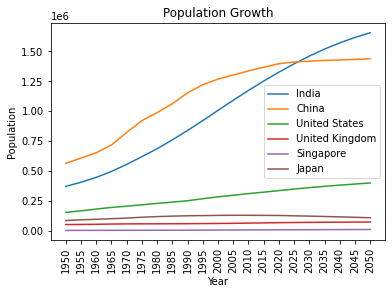

In [11]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.title('Population Growth') 
plt.xlabel("Year")
plt.ylabel("Population")
plt.xticks(rotation = 90); #ROTATION for the x axis labels

plt.plot(df['India'], label='India')
plt.plot(df['China'], label='China')
plt.plot(df['United States'], label='United States')
plt.plot(df['United Kingdom'], label='United Kingdom')
plt.plot(df['Singapore'], label='Singapore')
plt.plot(df['Japan'], label='Japan')
plt.legend();

### 2.2 Find 10 most populous countries ( 15 pts)

Find 10 most popoulous coutntries in 1960, 1980, 2000, 2020, and 2040. 
Plot and compare their population. 

<AxesSubplot:>

Text(0.5, 1.0, 'Population Comparison')

Text(0, 0.5, 'Year')

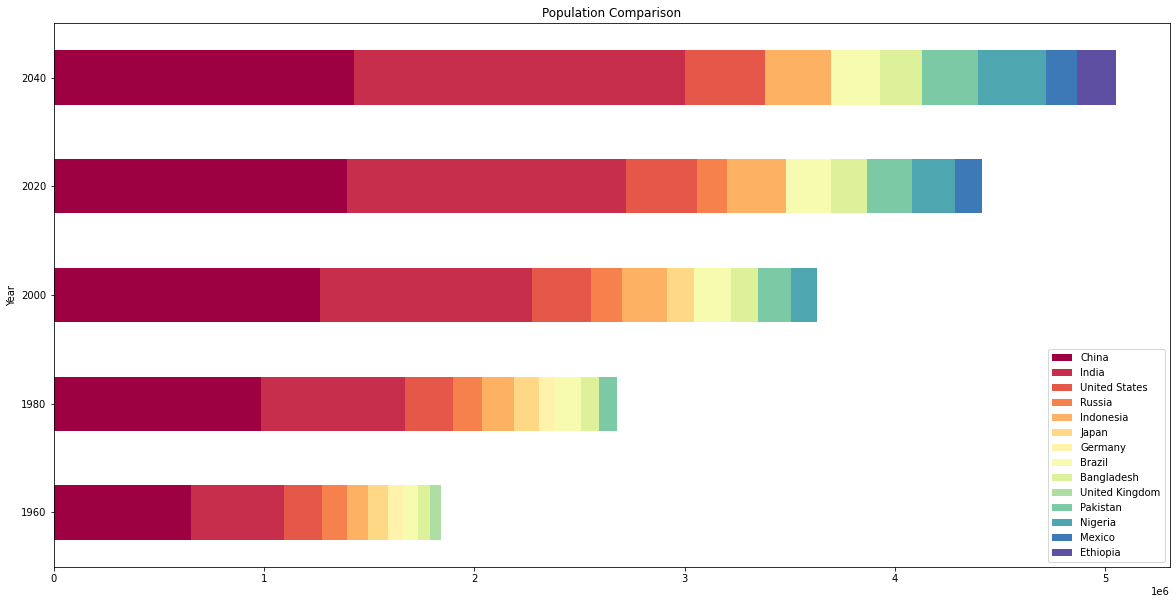

In [12]:
# Your code here
df_transpose= df.T

# Ten largest values in 1960, 1980, 2000, 2020, and 2040 
largest_1960 = df_transpose.nlargest(10, ['1960'])['1960']
largest_1980 = df_transpose.nlargest(10, ['1980'])['1980']
largest_2000 = df_transpose.nlargest(10, ['2000'])['2000']
largest_2020 = df_transpose.nlargest(10, ['2020'])['2020']
largest_2040 = df_transpose.nlargest(10, ['2040'])['2040']

result = pd.concat([largest_1960, largest_1980, largest_2000, largest_2020, largest_2040 ], axis=1)
result.fillna(0, inplace=True)

df=result.T

from matplotlib import cm
cmap = cm.get_cmap('Spectral')

# Here, horizontal bar chart gives the comparision of countries by years and suggests which country's population
# is growing over the years, as an example, Ethiopia was not in the populus country until year 2020 but
# it's expected to show up in 2040, similarly Pakistan and India's population is growing over years and horizontal
# bar chart is helpful in comparing it over the years
df.plot(kind='barh', stacked=True, figsize=(20, 10), cmap=cmap, edgecolor='None')
plt.title('Population Comparison') 

plt.ylabel("Year")
plt.show()